## Visualize outputs


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys,inspect
sys.path.insert(0,"..")

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)

# Font Size
# import matplotlib
# font = {'family' : 'DejaVu Sans',
#         'weight' : 'bold',
#         'size'   : 12}

import cv2
import numpy as np
import string

In [3]:
def visualize(idx, **images):
    """Plot images in one row.""" 
    n = len(images)
    fig = plt.figure(figsize=(18, 16))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        #if idx==0:
        plt.title(' '.join(name.split('_')).lower(), fontsize=20)
        w,h = (1,25)
        fs = 1.0
        color = (0,0,0)
        font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
        cv2.putText(image, str(idx), (w,h), font, fs, color, 1, cv2.LINE_AA)
        plt.imshow(image, cmap='gray')
        plt.axis("off")
        plt.tight_layout()
    plt.savefig("../outputs/analysis/{}.png".format(idx), facecolor="white", bbox_inches = 'tight')
    plt.show()
    
    
def make_dataset(dir):
    images = []
    assert os.path.isdir(dir), '%s is not a valid directory' % dir

    f = dir.split('/')[-1].split('_')[-1]
    #print (dir, f)
    dirs= os.listdir(dir)
    for img in dirs:

        path = os.path.join(dir, img)
        #print(path)
        images.append(path)
    return images

def read_image(path):
    image = cv2.imread(path, -1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
# Path to model
algo1 = "acgpn_5000"
algo2 = "resunet_g1"

# Path to output tryon images
mode = "all" # all, all_same, easy, medium, hard
algo1_tryon_path = "../outputs/{}/{}/".format(algo1, mode)
algo2_tryon_path = "../outputs/{}/{}/".format(algo2, mode)

# File paths
algo1_tryon_files = sorted(make_dataset(algo1_tryon_path))
algo2_tryon_files = sorted(make_dataset(algo2_tryon_path))
algo3_tryon_files = sorted(make_dataset("../outputs/cpvtonpp5000-try-ons"))
#algo4_tryon_files = sorted(make_dataset("../outputs/cpvtonpp-try-ons"))

# Path to warped clothes mask
gt_wcr_path = "../outputs/{}/{}/".format(algo2, "gt_clothes_mask")
algo1_wcr_path = "../outputs/{}/{}/".format(algo1, "wcrmask")
algo2_wcr_path = "../outputs/{}/{}/".format(algo2, "wcrmask")

# File paths
gt_wcr_files = sorted(make_dataset(gt_wcr_path)) # gt mask
algo1_wcr_path = sorted(make_dataset(algo1_wcr_path)) # algo1 pred
algo2_wcr_path = sorted(make_dataset(algo2_wcr_path)) # algo2 pred

# Path to reference person and cloth images
ref_person_path = "../../datasets/acgpn_data/try_on_testing/"

persons = []
clothes = []

with open(os.path.join("../../datasets/acgpn_data/try_on_testing/test_pairs.txt"), 'r') as f:
    for line in f.readlines():
        h_name, c_name = line.strip().split()
        persons.append(h_name)
        clothes.append(c_name)

ref_person_paths = [os.path.join(ref_person_path, "test_img", x) for x in persons]
target_clothes_paths = [os.path.join(ref_person_path, "test_color", x) for x in clothes]

### Show all images

In [ ]:
# i = 0
# for num in range(2032):
#     visualize(i, reference_person=read_image(ref_person_paths[num]), target_clothes=read_image(target_clothes_paths[num]),
#               Clothing_Region_GT=read_image(gt_wcr_files[num])[:,:,0], 
#               Unet=read_image(algo1_wcr_path[num])[:,:,0], resunet=read_image(algo2_wcr_path[num])[:,:,0],
#               ACGPN=read_image(algo1_tryon_files[num]), Ours=read_image(algo2_tryon_files[num]))
#     i+=1


# Using this....
# i = 0
# for num in range(2032):
#     visualize(i, reference_person=read_image(ref_person_paths[num]), target_clothes=read_image(target_clothes_paths[num]),
#               ACGPN=read_image(algo1_tryon_files[num]), Ours=read_image(algo2_tryon_files[num]))
#     i+=1

In [ ]:
i = 0
for num in range(2032):
    visualize(i, reference_person=read_image(ref_person_paths[num]), target_clothes=read_image(target_clothes_paths[num]),
              ACGPN=read_image(algo1_tryon_files[num]), 
             CPVTONPP=read_image(algo3_tryon_files[num]),
             Ours=read_image(algo2_tryon_files[num]))
    i+=1

### Show masks

In [ ]:
# nums = np.array([6, 82, 17, 18, 23, 28, 57, 59, 67, 71, 120, 169, 239, 305, 307, 507, 1868, 1961, 1981, 2012])[-12:]
# nums

In [ ]:
# i = 0
# for num in nums:
#     visualize(i, reference_person=read_image(ref_person_paths[num]),
#               Clothing_Region_GT=read_image(gt_wcr_files[num])[:,:,0], 
#               Unet=read_image(algo1_wcr_path[num])[:,:,0], resunet=read_image(algo2_wcr_path[num])[:,:,0])
#     i+=1

In [ ]:
# Plot using npstack

# arrs = []
# for refp, clt, gtwcr, a1wcr, a2wcr, a1, a2 in zip(ref_person_paths[:slc], target_clothes_paths[:3], 
#                   gt_wcr_files[:slc], algo1_wcr_path[:slc], algo2_wcr_path[:slc], algo1_tryon_files[:slc],
#                   algo2_tryon_files[:slc]):
    
#     person=read_image(refp)
#     cloth=read_image(clt)

#     wcr=read_image(gtwcr) 
#     #wcr= np.where(wcr==127, 0, wcr)

#     wcr_acgpn=read_image(a1wcr) 
#     #wcr_acgpn= np.where(wcr_acgpn==127, 0, wcr_acgpn)

#     wcr_ours=read_image(a2wcr)
#     #wcr_ours= np.where(wcr_ours==127, 0, wcr_ours)

#     acgpn=read_image(a1)
#     ours=read_image(a2)
    
#     out = np.hstack((person, cloth, wcr, wcr_acgpn, wcr_ours, acgpn, ours))
#     #out = np.pad(out, pad_width=1, mode='constant', constant_values=0)
#     arrs.append(out)    

In [ ]:
# final_output = np.vstack((x for x in arrs))
# final_output.shape

In [ ]:
# plt.figure(figsize=(18, 16))
# plt.axis("off")
# plt.imshow(final_output, cmap='gray');

### Plot images with mask

In [ ]:
# nums = np.random.randint(0, 2032, 5)
# nums

In [ ]:
# nums = [i for i in range(5)] # 5

In [ ]:
# rows = len(nums)
# cols = 7
# fig, axarr = plt.subplots(rows, cols, figsize=(40, 38), constrained_layout=True)

# for r in range(rows):
#     reference_person=read_image(ref_person_paths[nums[r]])
#     target_clothes=read_image(target_clothes_paths[nums[r]])
#     Clothing_Region_GT=read_image(gt_wcr_files[nums[r]])[:,:,0]
#     Unet=read_image(algo1_wcr_path[nums[r]])[:,:,0]
#     resunet=read_image(algo2_wcr_path[nums[r]])[:,:,0]
#     ACGPN=read_image(algo1_tryon_files[nums[r]])
#     Ours=read_image(algo2_tryon_files[nums[r]])
    
#     images = [reference_person, target_clothes, Clothing_Region_GT, Unet, resunet, ACGPN, Ours]
#     captions = ["Reference \n Person", "Target \n Clothes", "Clothing Region \n Ground Truth", "U-Net", "Res U-Net", "ACGPN", "Ours"]
    
#     for c in range(cols):
#         axarr[r, c].imshow(images[c], cmap='gray')
#         axarr[r, c].axis("off")
#         axarr[r, c].set_aspect('equal')
#         if r==0:
#             axarr[r, c].set_title(captions[c], fontsize=50)

# plt.savefig("../outputs/visualization_all.png", facecolor="white", bbox_inches = 'tight', dpi=300)

## Tryon images

In [6]:
nums = np.random.randint(0, 2032, 12)
nums

array([1904, 1487, 1486,  230,  894,  370,  366, 1526, 1446,  442, 1902,
       1724])

In [35]:
# acgpn and res acgpn
#nums = np.array([6, 82, 17, 18, 23, 28, 57, 59, 67, 71, 120, 169, 239, 305, 307, 507, 1868, 1961, 1981, 2012])[-12:]

# With acgpn, cpvton+, res acgpn
#nums = np.array([5,6,9,18,59,172,189,190,275,277,322,566,743,1024,1417,1954,2012, 2031])[:12]
nums = np.array([2031,2012,9,18,743,1417,189,190,275,277,322,566,743,1024,1417,1954,2012, 2031])[:12]
nums

array([2031, 2012,    9,   18,  743, 1417,  189,  190,  275,  277,  322,
        566])

In [36]:
len(nums)

12

In [37]:
# nums = [i for i in range(12)]
# nums

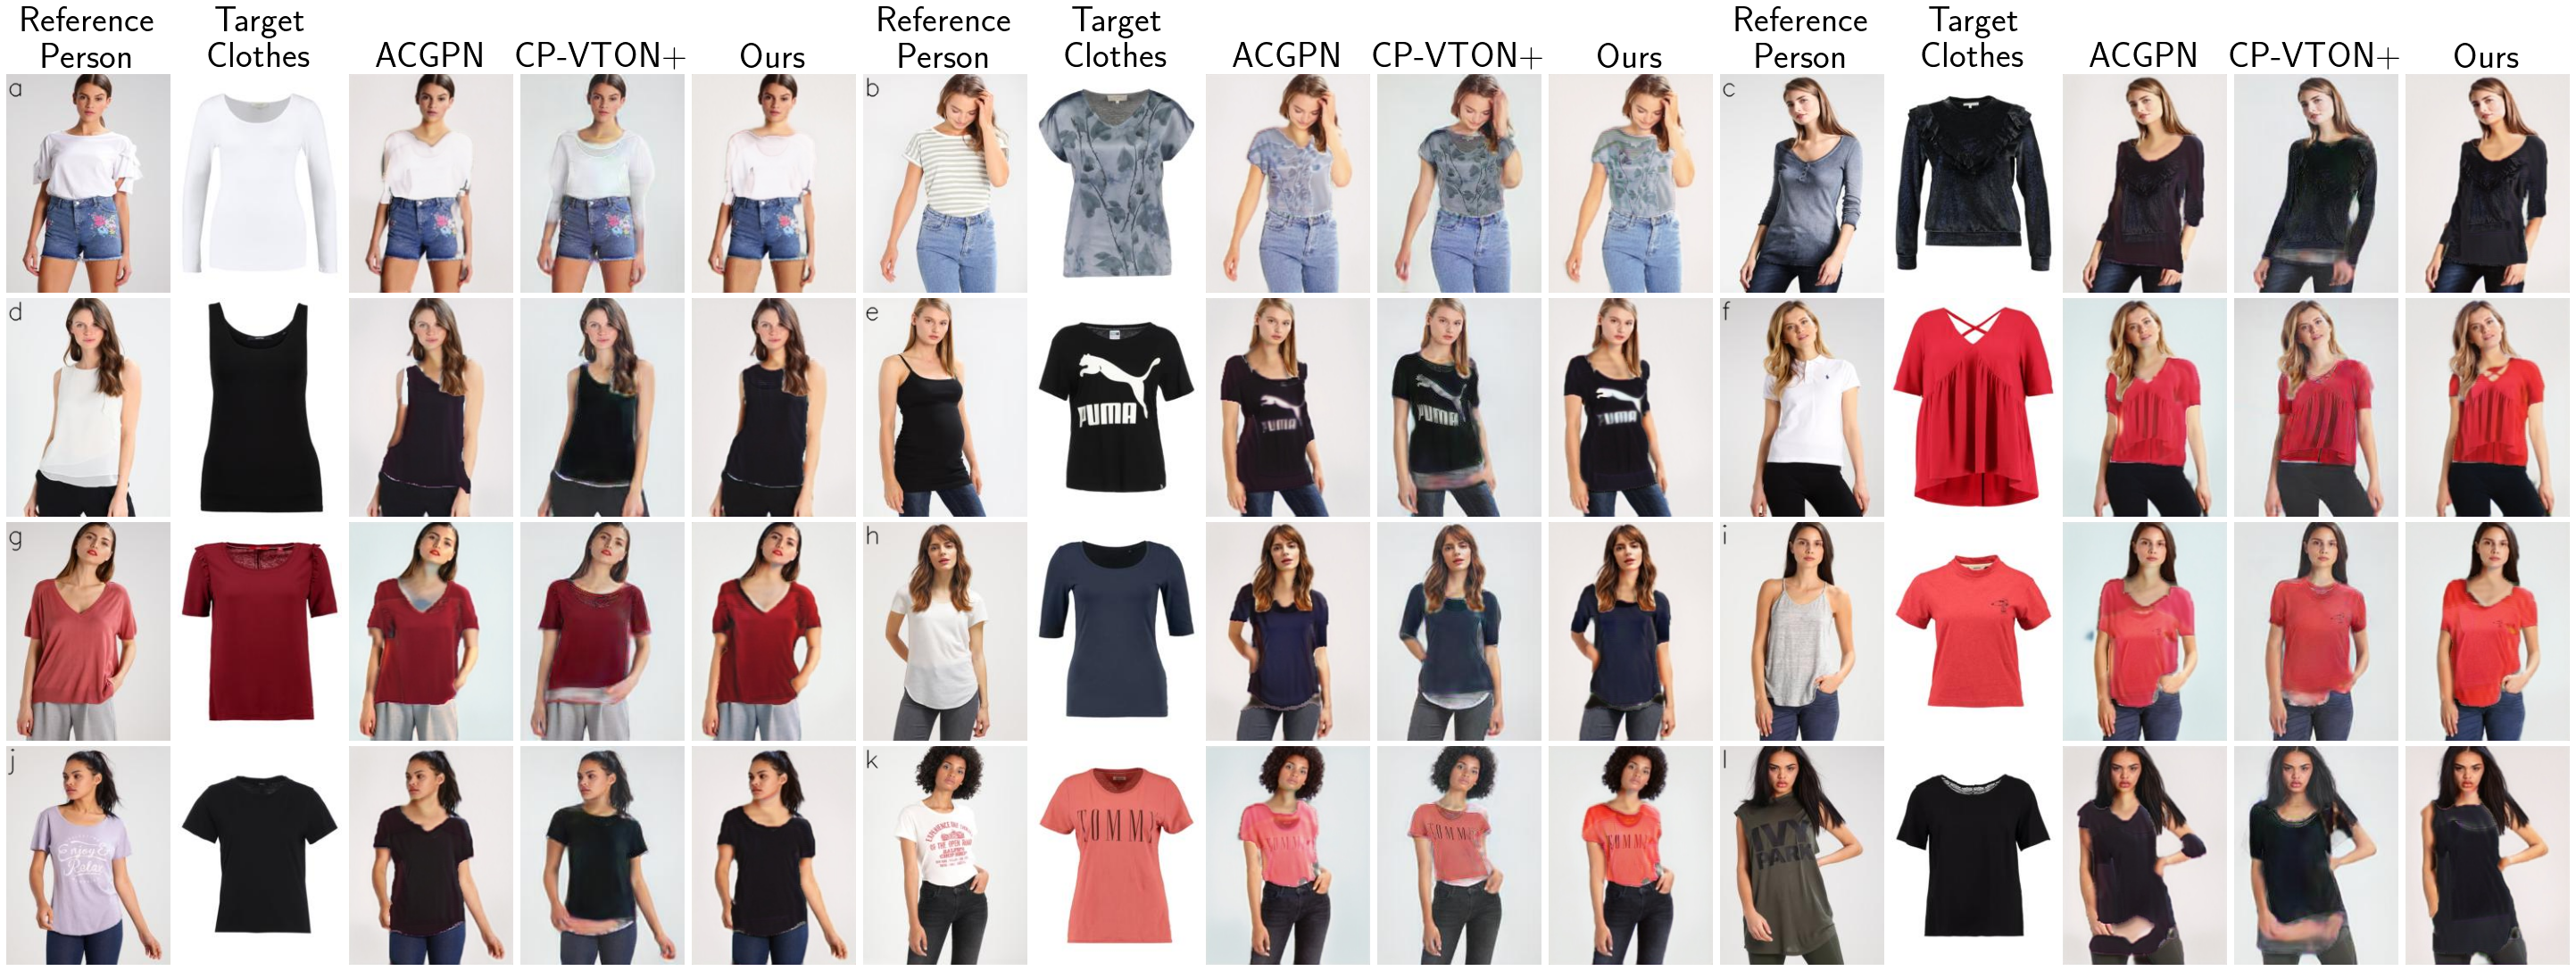

In [52]:
rows = int(len(nums) / 3)
cols = 15
fig, axarr = plt.subplots(rows, cols, figsize=(40, 15), constrained_layout=True)


alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)

v = 0
for r in range(rows):
    rp1=read_image(ref_person_paths[nums[v+r]])
    w,h = (1,25)
    fs = 1.0
    color = (0,0,0)
    font = cv2.FONT_HERSHEY_SIMPLEX #FONT_HERSHEY_DUPLEX  #press tab for different operations
    cv2.putText(rp1, str(alphabet_list[v+r]), (w,h), font, fs, color, 1, cv2.LINE_AA)
    tc1=read_image(target_clothes_paths[nums[v+r]])
    a1=read_image(algo1_tryon_files[nums[v+r]])
    cpv1 = read_image(algo3_tryon_files[nums[v+r]])
    o1=read_image(algo2_tryon_files[nums[v+r]])
    
    rp2=read_image(ref_person_paths[nums[v+r+1]])
    cv2.putText(rp2, str(alphabet_list[v+r+1]), (w,h), font, fs, color, 1, cv2.LINE_AA)
    tc2=read_image(target_clothes_paths[nums[v+r+1]])
    a2=read_image(algo1_tryon_files[nums[v+r+1]])
    cpv2 = read_image(algo3_tryon_files[nums[v+r+1]])
    o2=read_image(algo2_tryon_files[nums[v+r+1]])
    
    rp3=read_image(ref_person_paths[nums[v+r+2]])
    cv2.putText(rp3, str(alphabet_list[v+r+2]), (w,h), font, fs, color, 1, cv2.LINE_AA)
    tc3=read_image(target_clothes_paths[nums[v+r+2]])
    a3=read_image(algo1_tryon_files[nums[v+r+2]])
    cpv3 = read_image(algo3_tryon_files[nums[v+r+2]])
    o3=read_image(algo2_tryon_files[nums[v+r+2]])
    
    v+=2
    
    images = [rp1, tc1, a1, cpv1, o1, rp2, tc2, a2, cpv2, o2, rp3, tc3, a3, cpv3, o3]
    
    captions = ["Reference \n Person", "Target \n Clothes", "ACGPN", "CP-VTON+", "Ours",
                "Reference \n Person", "Target \n Clothes", "ACGPN", "CP-VTON+", "Ours",
                "Reference \n Person", "Target \n Clothes", "ACGPN", "CP-VTON+", "Ours"]
    
    for c in range(cols):
        axarr[r, c].imshow(images[c], cmap='gray')
        axarr[r, c].axis("off")
        axarr[r, c].set_aspect('equal') 
        if r==0:
            axarr[r, c].set_title(captions[c], fontsize=40)

plt.savefig("../outputs/visualization_tryons.pdf", facecolor="white", bbox_inches = 'tight', dpi=300)